# Explore Stack Exchange Website.


In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [3]:
#READ IN CSV FILE#
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [4]:
questions.info()
#Seven columns
#8839 rows
#1 date and time,1 float(FAVORITECOUNT),4 integers,1 object
#The FavoriteCounts Column has almost six times more NAN  than non null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In [5]:
#examine first 10 rows
questions.head(5)

Id        CreationDate  Score  ViewCount  \
0  44419 2019-01-23 09:21:13      1         21   
1  44420 2019-01-23 09:34:01      0         25   
2  44423 2019-01-23 09:58:41      2       1651   
3  44427 2019-01-23 10:57:09      0         55   
4  44428 2019-01-23 11:02:15      0         19   

                                                Tags  AnswerCount  \
0                    <machine-learning><data-mining>            0   
1  <machine-learning><regression><linear-regressi...            0   
2       <python><time-series><forecast><forecasting>            0   
3              <machine-learning><scikit-learn><pca>            1   
4           <dataset><bigdata><data><speech-to-text>            0   

   FavoriteCount  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [6]:
questions.isna().sum()
#Count NAN values for the columns

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

## NAN COUNT
   1.  The FavoriteCount has the most NAN values at 7432. 
   2.  The rest of the columns have 0 nan values.
   3.  I belive changing the NAN value to a 0 could be helpful. 
   4.  There are plenty of columns and types.
   5.  The tags column could be seperated. there would be a totla of 5 new columns for the tags since 5 are allowed. I belive it would be a waste of time.

In [7]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [8]:
#Fill The FavoriteCount coulmn with 0
questions.fillna(value ={"FavoriteCount":0}, inplace=True)
questions["FavoriteCount"]=questions["FavoriteCount"].astype(int)
#Check outcome and its all non-null now
questions.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


In [9]:
# clean Tags column. Removes the < and > from the string. 
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

questions["Tags"].head(10)

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
5                                        [fuzzy-logic]
6    [time-series, anomaly-detection, online-learning]
7                               [matrix-factorisation]
8                [correlation, naive-bayes-classifier]
9    [machine-learning, python, deep-learning, kera...
Name: Tags, dtype: object

In [10]:
questions.sample(3)

Id        CreationDate  Score  ViewCount  \
4541  50884 2019-04-25 04:24:31      0         20   
8695  55677 2019-07-15 07:55:47      0        770   
627   45153 2019-02-06 10:37:31      1         30   

                                      Tags  AnswerCount  FavoriteCount  
4541    [feature-selection, random-forest]            0              0  
8695  [deep-learning, keras, cnn, convnet]            0              0  
627                     [machine-learning]            1              0

In [11]:
#counts tags in each "Tags"
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [12]:
#Fill in the missing NAN vlaues with a 0. 
tag_count = pd.DataFrame.from_dict(tag_count,orient ="index")

tag_count.rename(columns={0:"Count"},inplace=True)

tag_count.head(10)



Count
pca                           85
deep-learning               1220
lstm                         402
probabilistic-programming      9
objective-function             4
gensim                        36
sagemaker                      8
randomized-algorithms          6
association-rules             19
beginner                      27

In [13]:
# The ten largest cout of tags
tag_count.nlargest(10,"Count")

Count
machine-learning   2693
python             1814
deep-learning      1220
neural-network     1055
keras               935
classification      685
tensorflow          584
scikit-learn        540
nlp                 493
cnn                 489

In [14]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

Count
machine-learning-model    224
statistics                234
clustering                257
predictive-modeling       265
r                         268
dataset                   340
regression                347
pandas                    354
lstm                      402
time-series               466
cnn                       489
nlp                       493
scikit-learn              540
tensorflow                584
classification            685
keras                     935
neural-network           1055
deep-learning            1220
python                   1814
machine-learning         2693

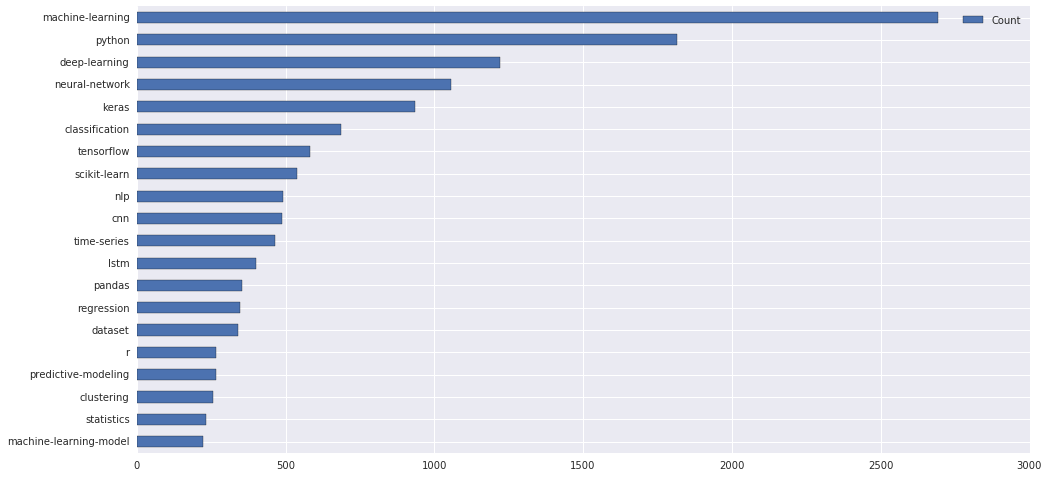

In [15]:
#visual
most_used.plot(kind="barh",figsize=(16,8))
# The tags like machine-learning or python are very broad. 


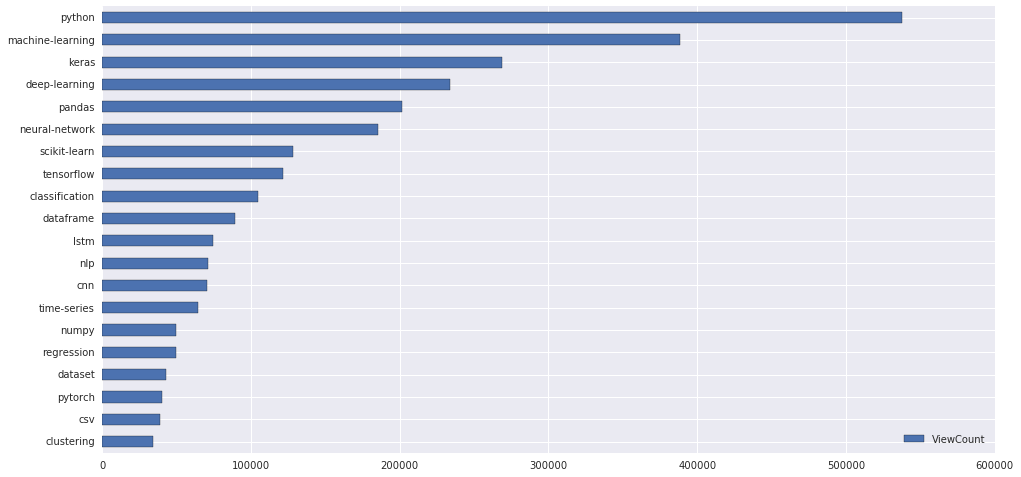

In [16]:

tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb6640fd30>],
      dtype=object)

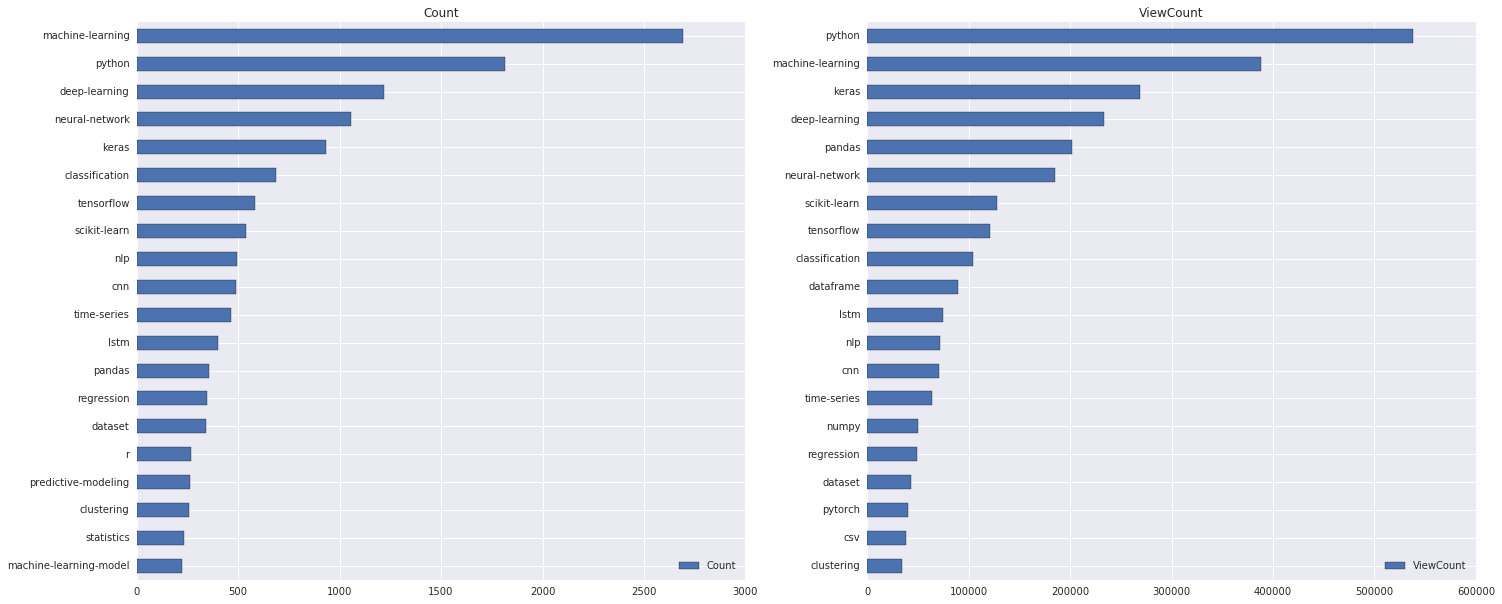

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [18]:
#merege most_used and most_viewed dataframe
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)



In [19]:
#create list of tags 
all_tags = list(tag_count.index)


In [20]:
#create dataframe with tags as columns and rows. 
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]



pca deep-learning lstm probabilistic-programming
pca                        NaN           NaN  NaN                       NaN
deep-learning              NaN           NaN  NaN                       NaN
lstm                       NaN           NaN  NaN                       NaN
probabilistic-programming  NaN           NaN  NaN                       NaN

In [21]:
#fill the associations with 0's

associations.fillna(0,inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [22]:


relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)



In [23]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

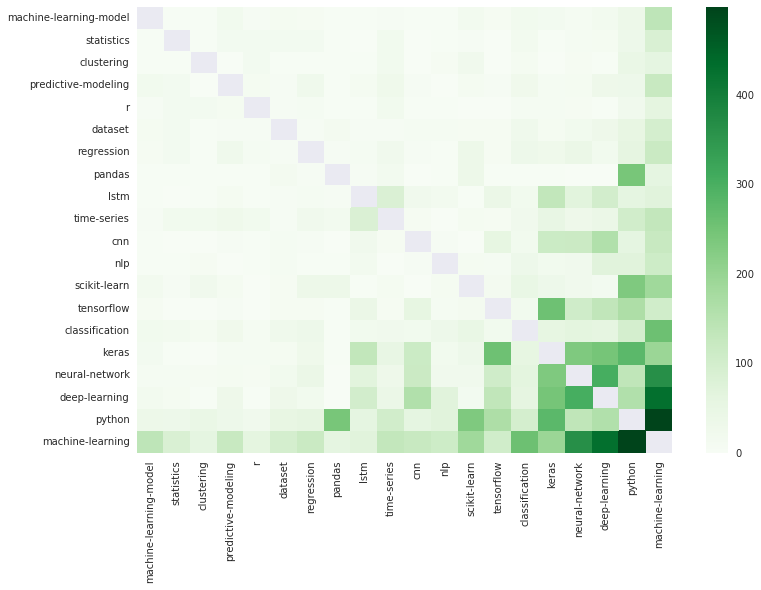

In [24]:
#creates a heat map
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)





The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk — you'll learn more about statistical independence in the next step).

We won't get into the details of it, as the technique is out of scope for this course, but it is a path worth investigating!



Enter Domain Knowledge

Keras, scikit-learn, TensorFlow are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learnin

In [26]:
#Parse dates in all_q dataframe
all_q = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])



In [27]:
#Clean tags as I did in the first part.
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")





Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.


In [29]:
#Create function that assigns 1 to Deep Learning and 0 to the others

def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0



In [30]:
#Apply the function class_deep_learning
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [31]:
#Sample the all_q 
all_q.sample(5)

Id        CreationDate  \
12606  30336 2018-04-15 09:27:32   
19434  13124 2016-08-01 12:21:09   
16474  63301 2019-11-17 19:01:41   
19953  34029 2018-07-05 09:21:48   
7624   40730 2018-11-05 07:15:43   

                                                    Tags  DeepLearning  
12606                            [apache-spark, pyspark]             0  
19434        [r, predictive-modeling, linear-regression]             0  
16474  [python, pandas, numpy, matplotlib, data-analy...             0  
19953         [python, keras, tensorflow, gpu, parallel]             1  
7624                   [python, pandas, data, databases]             0

In [33]:
#Get Data for all years except 2020 for first quarter
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

In [34]:
#create a column that identifies the quarter in which a question was asked.
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)



In [35]:

all_q.head()



Id        CreationDate  \
0  45416 2019-02-12 00:36:29   
1  45418 2019-02-12 00:50:39   
2  45422 2019-02-12 04:40:51   
3  45426 2019-02-12 04:51:49   
4  45427 2019-02-12 05:08:24   

                                                Tags  DeepLearning Quarter  
0      [python, keras, tensorflow, cnn, probability]             1    19Q1  
1                                   [neural-network]             1    19Q1  
2                      [python, ibm-watson, chatbot]             0    19Q1  
3                                            [keras]             1    19Q1  
4  [r, predictive-modeling, machine-learning-mode...             0    19Q1


For the final stretch of this screen, we'll group by quarter and:

    Count the number of deep learning questions.
    Count the total number of questions.
    Compute the ratio between the two numbers above.



In [36]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

Quarter  DeepLearningQuestions  TotalQuestions  DeepLearningRate
0     14Q2                      9             157          0.057325
20    19Q2                    935            2393          0.390723
15    18Q1                    554            1221          0.453726
22    19Q4                    809            2036          0.397348
13    17Q3                    247             714          0.345938